In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from keras.layers import Embedding, GRU, Dense, Dropout, SimpleRNN
import seaborn as sns

In [ ]:
url_train = '/content/drive/My Drive/440 files/train.En.csv'
url_test = '/content/drive/My Drive/440 files/task_A_En_test.csv'
train_dataset = pd.read_csv(url_train)
test_dataset = pd.read_csv(url_test)

In [ ]:
train_dataset = train_dataset[train_dataset['tweet'].notnull()]
test_dataset = test_dataset[test_dataset['text'].notnull()]

In [ ]:
x_train, y_train, x_test, y_test = train_dataset['tweet'], train_dataset['sarcastic'], test_dataset['text'], test_dataset['sarcastic']

In [ ]:
# Create a Tokenizer instance

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")  # num_words is the maximum number of words to keep

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(x_train)

# Convert the texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad the sequences to a fixed length
max_sequence_length1 = max(len(seq) for seq in train_sequences)
max_sequence_length2 = max(len(seq) for seq in test_sequences)
max_sequence_length = max(max_sequence_length1, max_sequence_length2)
padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

padded_sequences2 = pad_sequences(test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

In [ ]:
# Load pre-trained GloVe embeddings
glove_embeddings_index = {}
glove = '/content/drive/My Drive/440 files/glove.6B.100d.txt'
with open(glove, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_embeddings_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the GRU model with pre-trained embeddings
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    GRU(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
filePath = '/content/drive/My Drive/440 files/modelStoreGRU.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/trainingGRU.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train the model
model.fit(padded_sequences, y_train, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model (replace with your test data)
loss, accuracy = model.evaluate(padded_sequences2, y_test)

Epoch 1/500
98/98 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.7221
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/My Drive/440 files/modelStoreGRU.h5
98/98 [==============================] - 11s 91ms/step - loss: 0.6053 - accuracy: 0.7221 - val_loss: 0.3593 - val_accuracy: 1.0000
Epoch 2/500
98/98 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.7221
Epoch 2: val_accuracy did not improve from 1.00000
98/98 [==============================] - 9s 92ms/step - loss: 0.5930 - accuracy: 0.7221 - val_loss: 0.3197 - val_accuracy: 1.0000
Epoch 3/500
98/98 [==============================] - ETA: 0s - loss: 0.5928 - accuracy: 0.7221
Epoch 3: val_accuracy did not improve from 1.00000
98/98 [==============================] - 10s 99ms/step - loss: 0.5928 - accuracy: 0.7221 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 4/500
98/98 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7221
Epoch 

In [ ]:
GRU_accuracy = round(accuracy*100,2)
GRU_accuracy

85.71

In [ ]:
glove_embeddings_index = {}
glove = '/content/drive/My Drive/440 files/glove.6B.100d.txt'
with open(glove, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_embeddings_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the LSTM model with pre-trained embeddings
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/modelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/trainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]
# Train Machine
model.fit(padded_sequences, y_train, epochs=500, validation_split=0.1, callbacks=callbacks_list)
# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test)

Epoch 1/500
98/98 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.7224
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/My Drive/440 files/modelStoreLSTM.h5
98/98 [==============================] - 14s 115ms/step - loss: 0.6053 - accuracy: 0.7224 - val_loss: 0.3011 - val_accuracy: 1.0000
Epoch 2/500
98/98 [==============================] - ETA: 0s - loss: 0.5925 - accuracy: 0.7221
Epoch 2: val_accuracy did not improve from 1.00000
98/98 [==============================] - 10s 98ms/step - loss: 0.5925 - accuracy: 0.7221 - val_loss: 0.3476 - val_accuracy: 1.0000
Epoch 3/500
98/98 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.7221
Epoch 3: val_accuracy did not improve from 1.00000
98/98 [==============================] - 8s 79ms/step - loss: 0.5922 - accuracy: 0.7221 - val_loss: 0.3619 - val_accuracy: 1.0000
Epoch 4/500
98/98 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7221
Epoc

In [ ]:
# Task A calculate F1_sarcastic

from tensorflow.keras.models import load_model

# Load trained model
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)

# Convert probabilities to class labels
# Here, threshold is 0.277023
prediction = (prediction > 0.277023).astype(int)

f1_sarcastic = f1_score(y_test, prediction, average = "binary", pos_label = 1)
print(round(f1_sarcastic, 4))

44/44 [==============================] - 2s 24ms/step
0.0


In [ ]:
###### TASK B ######

train = '/content/drive/My Drive/440 files/train.En.csv'
testB = '/content/drive/My Drive/440 files/task_B_En_test.csv'
train_dataset = pd.read_csv(train)
test_dataset = pd.read_csv(testB)

train_dataset = train_dataset[train_dataset['tweet'].notnull()]
test_dataset = test_dataset[test_dataset['text'].notnull()]

In [ ]:
x_train, y_train = train_dataset['rephrase'], pd.concat([train_dataset['sarcasm'], train_dataset['irony'], train_dataset['satire'], train_dataset['understatement'], train_dataset['overstatement'], train_dataset['rhetorical_question']], axis=1)
x_train, y_train = x_train.dropna(), y_train.dropna()

y_train_sarcasm, y_train_irony, y_train_satire, y_train_understatement, y_train_overstatement, y_train_question = y_train['sarcasm'], y_train['irony'], y_train['satire'], y_train['understatement'], y_train['overstatement'], y_train['rhetorical_question']

x_test, y_test = test_dataset['text'], pd.concat([test_dataset['sarcasm'], test_dataset['irony'], test_dataset['satire'], test_dataset['understatement'],  test_dataset['overstatement'], test_dataset['rhetorical_question']], axis=1)
x_test, y_test = x_test.dropna(), y_test.dropna()

y_test_sarcasm, y_test_irony, y_test_satire, y_test_understatement, y_test_overstatement, y_test_question = y_test['sarcasm'], y_test['irony'], y_test['satire'], y_test['understatement'], y_test['overstatement'], y_test['rhetorical_question']

In [ ]:
# Create a Tokenizer instance

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")  # num_words is the maximum number of words to keep

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(x_train)

# Convert the texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad the sequences to a fixed length
max_sequence_length1 = max(len(seq) for seq in train_sequences)
max_sequence_length2 = max(len(seq) for seq in test_sequences)
max_sequence_length = max(max_sequence_length1, max_sequence_length2)
padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

padded_sequences2 = pad_sequences(test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

In [ ]:
# Compile the model for sarcasm
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskBSarcasmModelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskBSarcasmTrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_sarcasm, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_sarcasm)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.1795
Epoch 1: val_accuracy improved from -inf to 0.16092, saving model to /content/drive/My Drive/440 files/taskBSarcasmModelStoreLSTM.h5
25/25 [==============================] - 6s 106ms/step - loss: 0.8125 - accuracy: 0.1795 - val_loss: 0.7162 - val_accuracy: 0.1609
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5513
Epoch 2: val_accuracy improved from 0.16092 to 0.83908, saving model to /content/drive/My Drive/440 files/taskBSarcasmModelStoreLSTM.h5
25/25 [==============================] - 2s 84ms/step - loss: 0.6899 - accuracy: 0.5513 - val_loss: 0.6584 - val_accuracy: 0.8391
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.5755 - accuracy: 0.8205
Epoch 3: val_accuracy did not improve from 0.83908
25/25 [==============================] - 2s 86ms/step - loss: 0.5755 - accuracy: 0.8205 - val_loss: 0.4419 - val_accuracy: 0.8391
Epoc

44/44 [==============================] - 4s 64ms/step
F1-sarcasm Score: 0.0


<Axes: >

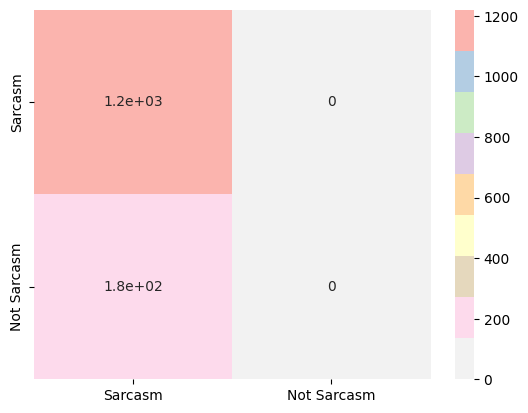

In [ ]:
# Load trained model
filePath = '/content/drive/My Drive/440 files/taskBSarcasmModelStoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)

# Convert probabilities to class labels
# Here, threshold is 0.77167
prediction = (prediction > 0.77167).astype(int)

f1_sarcasm = f1_score(y_test_sarcasm, prediction, average = "binary", pos_label = 1)
print("F1-sarcasm Score:", round(f1_sarcasm, 4))
f1_score_sarcasm = round(f1_sarcasm, 4)

cm = confusion_matrix(y_test_sarcasm, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Sarcasm' ,'Not Sarcasm'],yticklabels=['Sarcasm' ,'Not Sarcasm'])

In [ ]:
# Compile the model for irony
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskBIronyModelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskBIronyTrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_irony, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_irony)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.5551
Epoch 1: val_accuracy improved from -inf to 0.83908, saving model to /content/drive/My Drive/440 files/taskBIronyModelStoreLSTM.h5
25/25 [==============================] - 12s 227ms/step - loss: 0.6806 - accuracy: 0.5551 - val_loss: 0.5357 - val_accuracy: 0.8391
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.4800 - accuracy: 0.8192
Epoch 2: val_accuracy did not improve from 0.83908
25/25 [==============================] - 4s 172ms/step - loss: 0.4800 - accuracy: 0.8192 - val_loss: 0.4430 - val_accuracy: 0.8391
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.4736 - accuracy: 0.8192
Epoch 3: val_accuracy did not improve from 0.83908
25/25 [==============================] - 4s 141ms/step - loss: 0.4736 - accuracy: 0.8192 - val_loss: 0.4444 - val_accuracy: 0.8391
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.4750 - accuracy: 

44/44 [==============================] - 1s 23ms/step
F1-irony Score: 0.0


<Axes: >

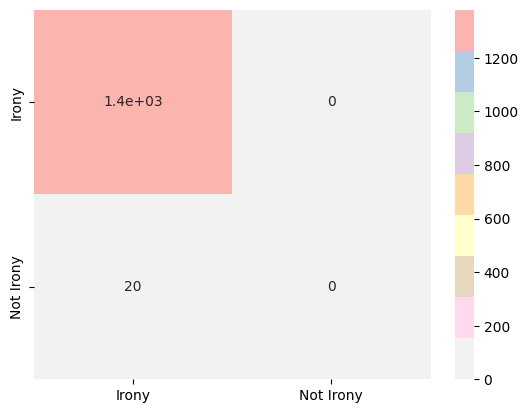

In [ ]:
# Load trained model
filePath = '/content/drive/My Drive/440 files/taskBIronyModelStoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)

# Convert probabilities to class labels
# Here, threshold is 0.432823
prediction = (prediction > 0.432823).astype(int)

f1_irony = f1_score(y_test_irony, prediction, average = "binary", pos_label = 1)
print('F1-irony Score:', round(f1_irony, 4))
f1_score_irony = round(f1_irony, 4)

cm = confusion_matrix(y_test_irony, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Irony' ,'Not Irony'],yticklabels=['Irony' ,'Not Irony'])

In [ ]:
# Compile the model for satire
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskBSatireModelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskBSatireTrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_satire, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_satire)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.1863 - accuracy: 0.9692
Epoch 1: val_accuracy improved from -inf to 0.98851, saving model to /content/drive/My Drive/440 files/taskBSatireModelStoreLSTM.h5
25/25 [==============================] - 5s 100ms/step - loss: 0.1863 - accuracy: 0.9692 - val_loss: 0.0656 - val_accuracy: 0.9885
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9692
Epoch 2: val_accuracy did not improve from 0.98851
25/25 [==============================] - 2s 91ms/step - loss: 0.1390 - accuracy: 0.9692 - val_loss: 0.0716 - val_accuracy: 0.9885
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.1379 - accuracy: 0.9692
Epoch 3: val_accuracy did not improve from 0.98851
25/25 [==============================] - 3s 135ms/step - loss: 0.1379 - accuracy: 0.9692 - val_loss: 0.0694 - val_accuracy: 0.9885
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0

44/44 [==============================] - 2s 24ms/step
0.0676


<Axes: >

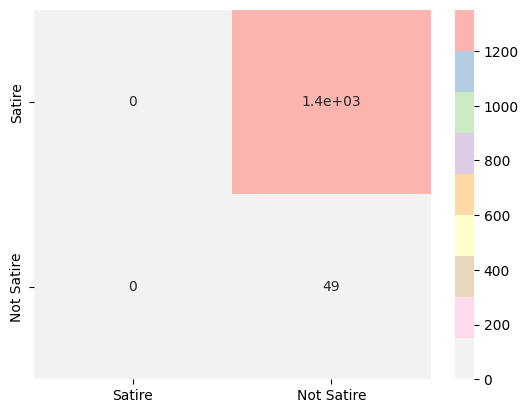

In [ ]:
# Load trained model

filePath = '/content/drive/My Drive/440 files/taskBSatireModelStoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)

# Convert probabilities to class labels
# Here, threshold is 0.0151090
prediction = (prediction > 0.0151090).astype(int)

f1_satire = f1_score(y_test_satire, prediction, average = "binary", pos_label = 1)
print(round(f1_satire, 4))
f1_score_satire = round(f1_satire, 4)

cm = confusion_matrix(y_test_satire, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Satire' ,'Not Satire'],yticklabels=['Satire' ,'Not Satire'])

In [ ]:
# Compile the model for understatement
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskBUnderstatementModelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskBUnderstatementTrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_understatement, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_understatement)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9885
Epoch 1: val_accuracy improved from -inf to 0.98851, saving model to /content/drive/My Drive/440 files/taskBUnderstatementModelStoreLSTM.h5
25/25 [==============================] - 7s 119ms/step - loss: 0.0637 - accuracy: 0.9885 - val_loss: 0.0628 - val_accuracy: 0.9885
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9885
Epoch 2: val_accuracy did not improve from 0.98851
25/25 [==============================] - 2s 79ms/step - loss: 0.0642 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9885
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9885
Epoch 3: val_accuracy did not improve from 0.98851
25/25 [==============================] - 2s 82ms/step - loss: 0.0630 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9885
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.0636 - accu

44/44 [==============================] - 2s 24ms/step
[[0.01161761]
 [0.01161761]
 [0.01161761]
 ...
 [0.01161761]
 [0.01161761]
 [0.01161761]]
0.0014


<Axes: >

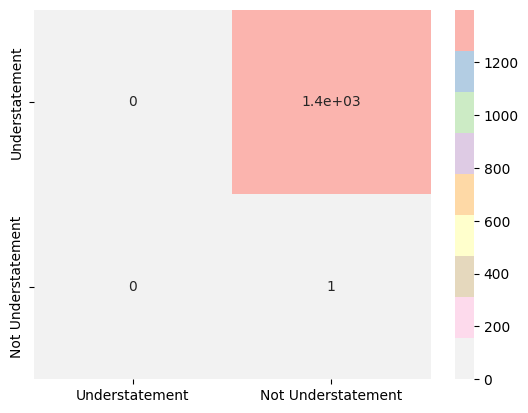

In [ ]:
filePath = '/content/drive/My Drive/440 files/taskBUnderstatementModelStoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)
print(prediction)
# Convert probabilities to class labels
# Here, threshold is 0.0082590
prediction = (prediction > 0.0082590).astype(int)

f1_understatement = f1_score(y_test_understatement, prediction, average = "binary", pos_label = 1)
print(round(f1_understatement, 4))
f1_score_understatement = round(f1_understatement, 4)

cm = confusion_matrix(y_test_understatement, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Understatement' ,'Not Understatement'],yticklabels=['Understatement' ,'Not Understatement'])

In [ ]:
# Compile the model for overstatement
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskBOverstatementModelStoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskBOverstatementTrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_overstatement, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_overstatement)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.1958 - accuracy: 0.9526
Epoch 1: val_accuracy improved from -inf to 0.96552, saving model to /content/drive/My Drive/440 files/taskBOverstatementModelStoreLSTM.h5
25/25 [==============================] - 6s 111ms/step - loss: 0.1958 - accuracy: 0.9526 - val_loss: 0.1604 - val_accuracy: 0.9655
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9526
Epoch 2: val_accuracy did not improve from 0.96552
25/25 [==============================] - 2s 86ms/step - loss: 0.1923 - accuracy: 0.9526 - val_loss: 0.1510 - val_accuracy: 0.9655
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.1920 - accuracy: 0.9526
Epoch 3: val_accuracy did not improve from 0.96552
25/25 [==============================] - 2s 83ms/step - loss: 0.1920 - accuracy: 0.9526 - val_loss: 0.1521 - val_accuracy: 0.9655
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.1924 - accur

44/44 [==============================] - 2s 23ms/step
[[0.06747469]
 [0.06747469]
 [0.06747469]
 ...
 [0.06747469]
 [0.06747469]
 [0.06747469]]
0.0


<Axes: >

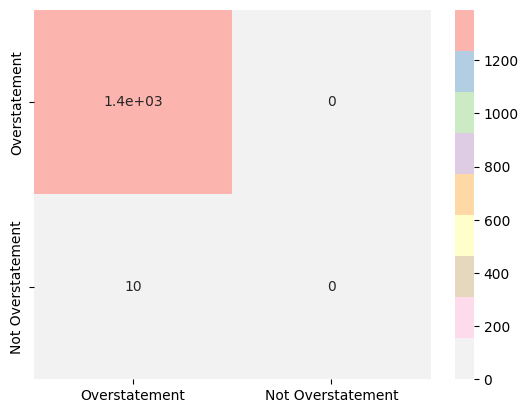

In [ ]:
filePath = '/content/drive/My Drive/440 files/taskBOverstatementModelStoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)
print(prediction)
# Convert probabilities to class labels
# Here, threshold is 0.07390644
prediction = (prediction > 0.07390644).astype(int)

f1_overstatement = f1_score(y_test_overstatement, prediction, average = "binary", pos_label = 1)
print(round(f1_overstatement, 4))
f1_score_overstatement = round(f1_overstatement, 4)

cm = confusion_matrix(y_test_overstatement, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Overstatement' ,'Not Overstatement'],yticklabels=['Overstatement' ,'Not Overstatement'])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

filePath = '/content/drive/My Drive/440 files/taskB_Rhetorical_Question_StoreLSTM.h5'  # Specify the path for the model checkpoint
checkpoint = ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/My Drive/440 files/taskB_Rhetorical_Question_TrainingLSTM.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [checkpoint, csv_logger, early_stopping]

# Train Machine
model.fit(padded_sequences, y_train_question, epochs=500, validation_split=0.1, callbacks=callbacks_list)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences2, y_test_question)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.8910
Epoch 1: val_accuracy improved from -inf to 0.81609, saving model to /content/drive/My Drive/440 files/taskB_Rhetorical_Question_StoreLSTM.h5
25/25 [==============================] - 6s 107ms/step - loss: 0.3487 - accuracy: 0.8910 - val_loss: 0.5161 - val_accuracy: 0.8161
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.3473 - accuracy: 0.8910
Epoch 2: val_accuracy did not improve from 0.81609
25/25 [==============================] - 2s 84ms/step - loss: 0.3473 - accuracy: 0.8910 - val_loss: 0.4940 - val_accuracy: 0.8161
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.3504 - accuracy: 0.8910
Epoch 3: val_accuracy did not improve from 0.81609
25/25 [==============================] - 3s 136ms/step - loss: 0.3504 - accuracy: 0.8910 - val_loss: 0.5238 - val_accuracy: 0.8161
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.3458 - a

44/44 [==============================] - 2s 25ms/step
[[0.09333045]
 [0.09333044]
 [0.09333045]
 ...
 [0.09333045]
 [0.09333045]
 [0.09333045]]
0.0156


<Axes: >

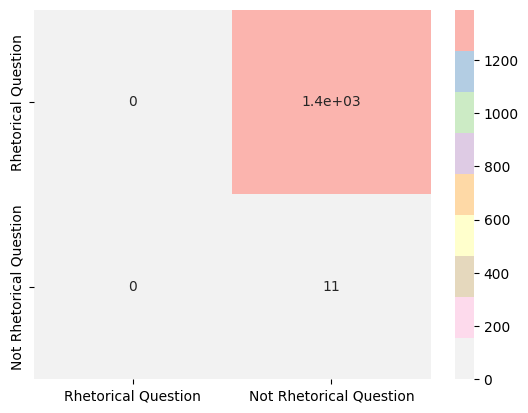

In [ ]:
filePath = '/content/drive/My Drive/440 files/taskB_Rhetorical_Question_StoreLSTM.h5'
model = load_model(filePath)

# Get predictions using model.predict
prediction = model.predict(padded_sequences2)
print(prediction)
# Convert probabilities to class labels
# Here, threshold is 0.0082590
prediction = (prediction > 0.0082590).astype(int)

f1_rhetorical_question = f1_score(y_test_question, prediction, average = "binary", pos_label = 1)
print(round(f1_rhetorical_question, 4))
f1_score_rhetorical_question = round(f1_rhetorical_question, 4)

cm = confusion_matrix(y_test_question, prediction)
sns.heatmap(cm, annot=True, cmap='Pastel1_r', xticklabels=['Rhetorical Question' ,'Not Rhetorical Question'],yticklabels=['Rhetorical Question' ,'Not Rhetorical Question'])

In [ ]:
print("-----F-1 Scores of-----")
print("Sarcasm:", f1_score_sarcasm)
print("Irony:", f1_score_irony)
print("Satire", f1_score_satire)
print("Understatement", f1_score_understatement)
print("Overstatement", f1_score_overstatement)
print("Rhetorical Question", f1_score_rhetorical_question)

-----F-1 Scores of-----
Sarcasm: 0.0
Irony: 0.0
Satire 0.0676
Understatement 0.0014
Overstatement 0.0
Rhetorical Question 0.0156


In [ ]:
# Plotting graph
import matplotlib.pyplot as plt
dict1 = {'KNN':knn_accuracy_withoutUndersample*100, 'LR':lr_accuracy_withoutundersample*100, 'NB':nb_accuracy_withoutundersample*100}

dict2 ={'KNN':knn_accuracy*100, 'LR':lr_accuracy*100, 'NB':nb_accuracy*100}

keys = list(dict1.keys())
values_dict1 = list(dict1.values())
values_dict2 = list(dict2.values())

plt.bar(keys, values_dict1, label='Before Under Sample', color='red')
plt.bar(keys, values_dict2, label='After Under Sample', color='purple')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Three Models (Before & After Under Sampling)')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
gnb_old_Precision = precision[1]
gnb_old_Recall = recall[1]
print('Precision:', gnb_old_Precision)
print('Recall:', gnb_old_Recall)

NameError: ignored